In [1]:
import random
import numpy as np
from matplotlib.font_manager import FontProperties
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect
from sklearn.manifold import TSNE
import seaborn as sns
import os
import umap
from sklearn.decomposition import PCA
from typing import Optional, Tuple, Any
from matplotlib.figure import Figure, SubplotParams
from matplotlib import ticker, pyplot as plt
from matplotlib.gridspec import GridSpec
import pickle

2024-10-31 20:43:00.843548: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-31 20:43:00.844914: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-31 20:43:00.866356: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-31 20:43:00.866798: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-31 20:43:01.255883: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

# 0 Set the font

In [2]:
COLOR = 'black'
def Load_style():
    try:
        plt.style.use("chartlab.mplstyle")
    except:
        pass
    plt.rcParams['font.sans-serif'] = ['Times New Roman']
    plt.rcParams["axes.unicode_minus"]= False
    # Sets the global font color
    plt.rcParams['text.color'] = COLOR
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR

    # Set the global font bold
    plt.rcParams['font.weight'] = 'bold'
    plt.rcParams['axes.labelweight'] = 'bold'
    font_path = '../data/fonts/Times New Roman.ttf'
    font = FontProperties(fname=font_path, size=14)
    return font

# 1 Drawing method

In [3]:
def draw_lower_dimension(
        data_list,
        title_list,
        xlabel_list,
        ylabel_list,
        label_list,
        color_list,
        save_dir,

        pylot: Any = plt,
        figsize: Optional[Tuple[float, float]] = (5, 5),
        dpi: int = 600,
        facecolor: str = 'white',
        edgecolor: str = 'white',
        linewidth: float = 0.2,
        frameon: bool = True,
        subplotpars: Optional[SubplotParams] = None,
        tight_layout: Optional[bool] = True,
        layout: Optional[str] = None,

        nrows: int = 1,
        ncols: int = 1,
        top: Optional[float] = None,
        bottom: Optional[float] = None,
        left: Optional[float] = None,
        right: Optional[float] = None,
        wspace: Optional[float] = None,
        hspace: Optional[float] = None,
        width_ratios: Any = None,
        height_ratios: Any = None,

        polar: bool = False,
        projection: str = None,
        sharex: Any = None,
        sharey: Any = None,
        label: str = None,
        fontsize: int = 24,
):
    font = Load_style()
    figsize = (figsize[0] * len(data_list), figsize[1])
    figure = pylot.figure(
        figsize=figsize,
        dpi=dpi,
        facecolor=facecolor,
        edgecolor=edgecolor,
        linewidth=linewidth,
        frameon=frameon,
        subplotpars=subplotpars,
        tight_layout=tight_layout,
        layout=layout,
    )
    ncols = ncols * len(data_list)
    gs = GridSpec(
        nrows=nrows,
        ncols=ncols,
        figure=figure,
        top=top,
        bottom=bottom,
        left=left,
        right=right,
        wspace=wspace,
        hspace=hspace,
        width_ratios=width_ratios,
        height_ratios=height_ratios,
    )
    ax = {}
    for i in range(nrows):
        for j in range(ncols):
            ax[(i, j)] = figure.add_subplot(
                gs[i, j],
                polar=polar,
                projection=projection,
                sharex=sharex,
                sharey=sharey,
                label=label,
                facecolor=facecolor,
            )
    for index, items in enumerate(data_list):
        ax[(0, index)].text(0, 1.05, title_list[index][:2], transform=ax[(0, index)].transAxes,
                        fontproperties=font, fontsize=fontsize-6, ha='left', va='center')
        ax[(0, index)].set_xlabel(xlabel_list[index])
        ax[(0, index)].set_ylabel(ylabel_list[index])
        sns.scatterplot(
            x=items[0][:, 0],
            y=items[0][:, 1],
            label=label_list[0],
            c=color_list[0],
            legend='full',
            ax=ax[(0, index)]
        )
        sns.scatterplot(
            x=items[1][:, 0],
            y=items[1][:, 1],
            label=label_list[1],
            c=color_list[1],
            legend='full',
            ax=ax[(0, index)]
        )
        ax[(0, index)].legend(loc= 'lower right', ncol=len(color_list))
    ax[(0, 0)].set_xlim(-2, 3)
    plt.subplots_adjust(
        # left=0.05,
        # right=0.95,
        # bottom=0.1,
        # top=0.19,
        wspace=0.3, hspace=0.8
    )
    plt.savefig(os.path.join(save_dir, 'lower_dimension.png'), dpi=600)
    plt.show()

# 2 Read the data

In [4]:
filepath_ = '../data/merged.sdf'
mols_ = Chem.SDMolSupplier(filepath_)
mols_ = [mol for mol in mols_ if mol is not None]
random.seed(42)
train_size = 544
for mol in mols_: Chem.GetSymmSSSR(mol)
fingerprints_mols_ = [GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048) for mol in mols_]
fp_array_mols_ = np.array([list(fp) for fp in fingerprints_mols_])

[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerator
[20:43:01] DEPRECATION WARNING: please use MorganGenerat

# 3 Dimensionality reduction

In [5]:
# T-SNE
tsne = TSNE(n_components=2)
fp_tsne = tsne.fit_transform(fp_array_mols_)
random.shuffle(fp_tsne)
fp_tsne_train = fp_tsne[:train_size]
fp_tsne_test = fp_tsne[train_size:]

# UMAP
reducer = umap.UMAP(n_components=2)
fp_umap = reducer.fit_transform(fp_array_mols_)
random.shuffle(fp_umap)
fp_umap_train = fp_umap[:train_size]
fp_umap_test = fp_umap[train_size:]

# PCA
pca = PCA(n_components=2)
fp_pca = pca.fit_transform(fp_array_mols_)
random.shuffle(fp_pca)
fp_pca_train = fp_pca[:train_size]
fp_pca_test = fp_pca[train_size:]

# 4 Change outliers

In [6]:
def udp_value(data_list, threshold=3):
    # The mean and standard deviation are calculated
    mean = np.mean(data_list)
    std_dev = np.std(data_list)

    # Define thresholds for outliers
    threshold = threshold * std_dev

    # Replace outliers
    for i in range(len(data_list)):
        if data_list[i] > mean + threshold or data_list[i] < mean - threshold:
            data_list[i] = mean  # Replace the outliers with the average
    return data_list

In [7]:
fp_umap_train[:, 0] = udp_value(fp_umap_train[:, 0])
fp_umap_train[:, 1] = udp_value(fp_umap_train[:, 1])
dataList = [
    [fp_pca_train, fp_pca_test],
    [fp_tsne_train, fp_tsne_test],
    [fp_umap_train, fp_umap_test],
]

# 5 Start drawing

findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'sans-serif' not found because none of the following fa

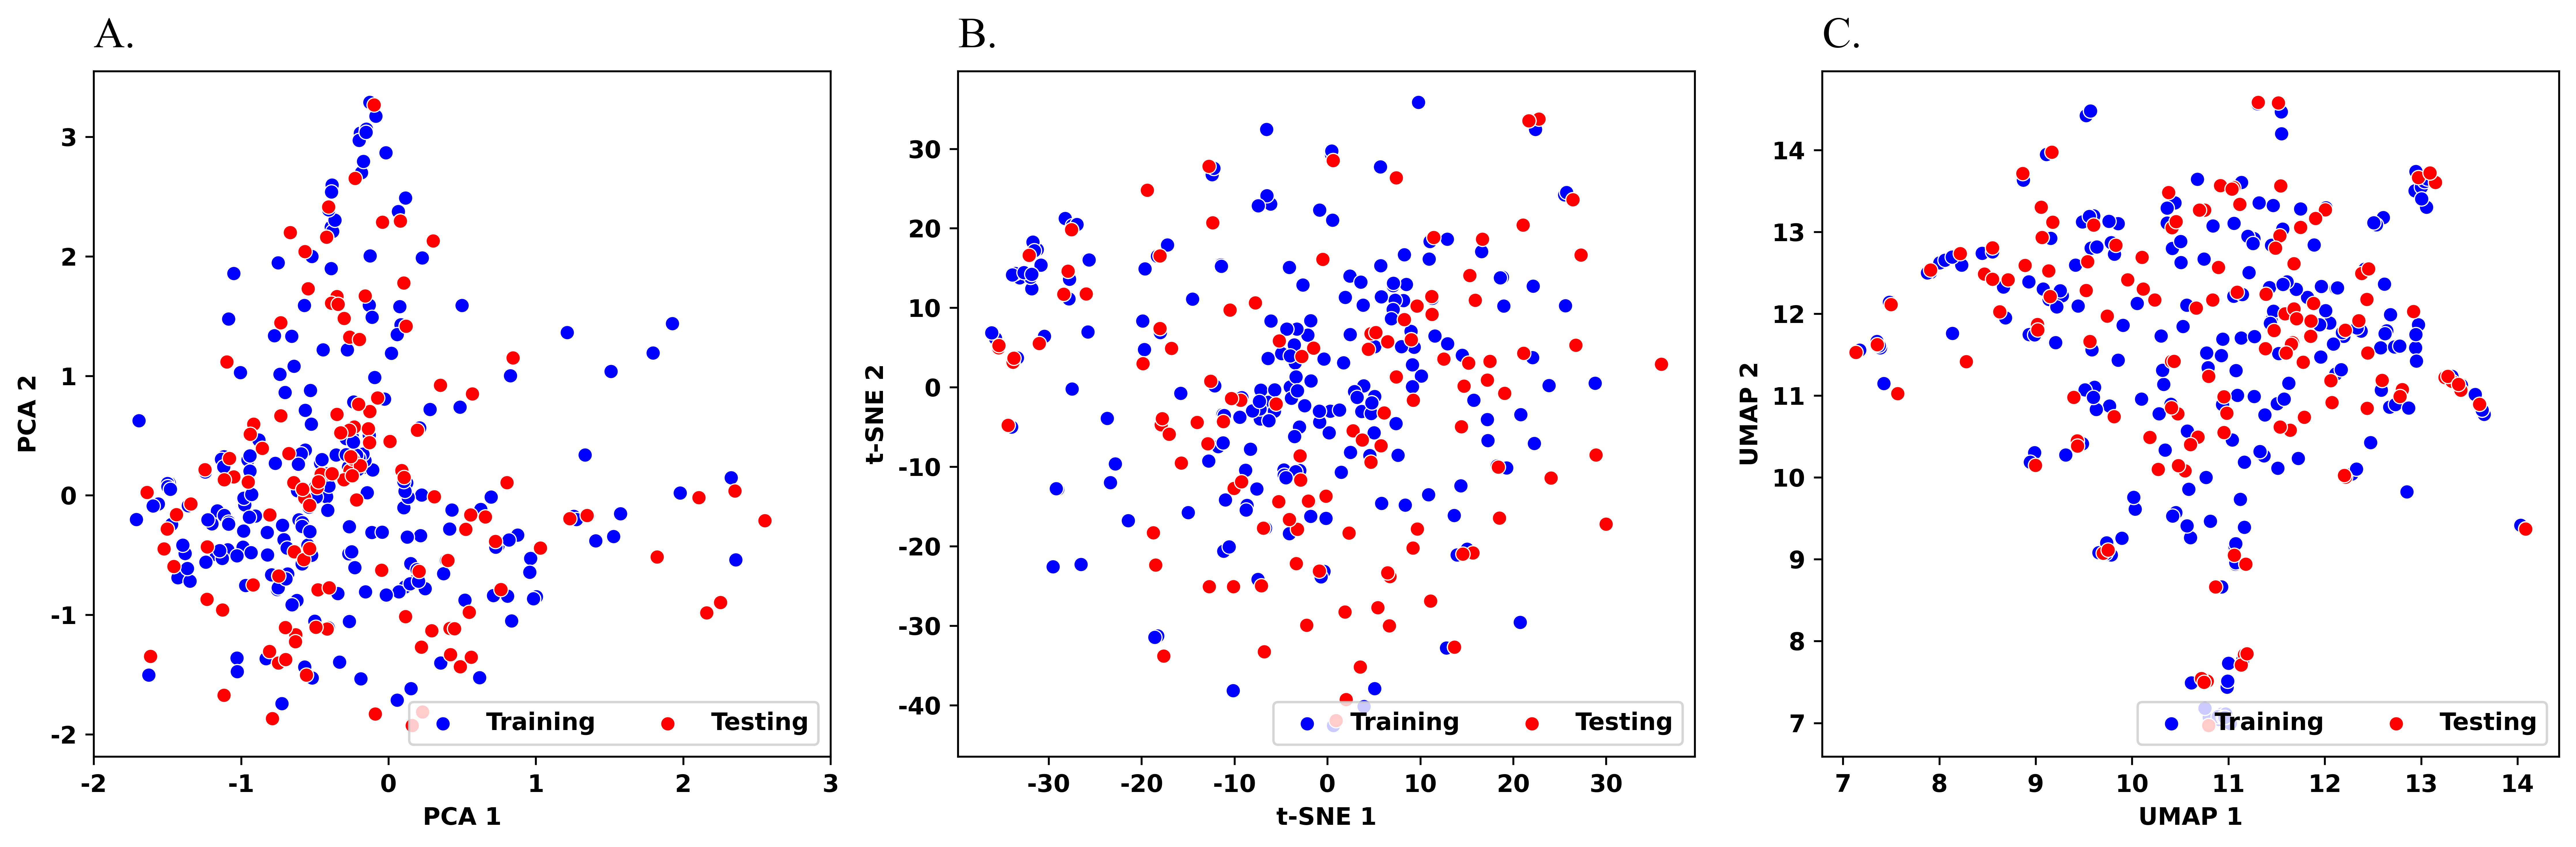

In [8]:
draw_lower_dimension(
    dataList,
    ['A.PCA', 'B.t-SNS', 'C.UMAP', ],
    ['PCA 1', 't-SNE 1', 'UMAP 1', ],
    ['PCA 2', 't-SNE 2', 'UMAP 2', ],
    ['Training', 'Testing'],
    ['blue', 'red'],
    save_dir='./'
)